### Implements algorithm 1 in the parti-game [paper](https://link.springer.com/content/pdf/10.1007/BF00993591.pdf)

Learn a controller from a start region to a goal region on a continuous space; Four increasingly effective algorithms to partition discrete state spaces. Algorithm 1 and 2 are non-learning; 3 and 4 learn, hence explore, the world while planning a route to the goal. Here, I implement algorithm 1

In [1]:
import sys
import numpy as np
from os.path import abspath, join
sys.path.append(abspath(join('..')))
sys.path.append(abspath(join('..', 'grids')))
sys.path.append(abspath(join('..', 'utils')))
sys.path.append(abspath(join('..', 'Visualization')))
sys.path.append(abspath(join('..')))

from Grids import *
import matplotlib.pyplot as plt
from Utilities import *
from BoundaryCondition import *
from Visualization import *
from ValueFuncs import proj
from math import pi
from InitialConditions import shapeCylinder
%matplotlib inline

### A Basic 2-D Grid and a signed distance function cylinder

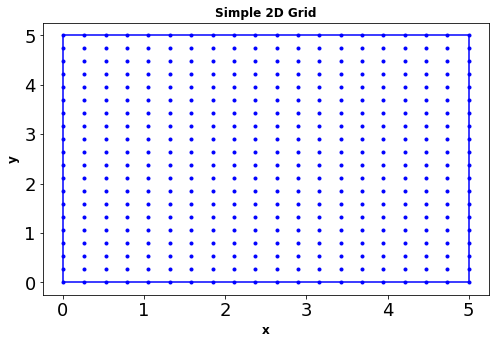

In [2]:
from math import pi
gridMin = np.array([[0,0]])
gridMax = np.array([[5, 5]])
N = 20 *np.ones((2,1)).astype(np.int64)
g = createGrid(gridMin, gridMax, N, low_mem=False, process=True)


viz = Visualizer(winsize=(8, 5))
viz.visGrid([g], g.dim, title='Simple 2D Grid')

### A 3-D Grid and a signed distance function cylinder

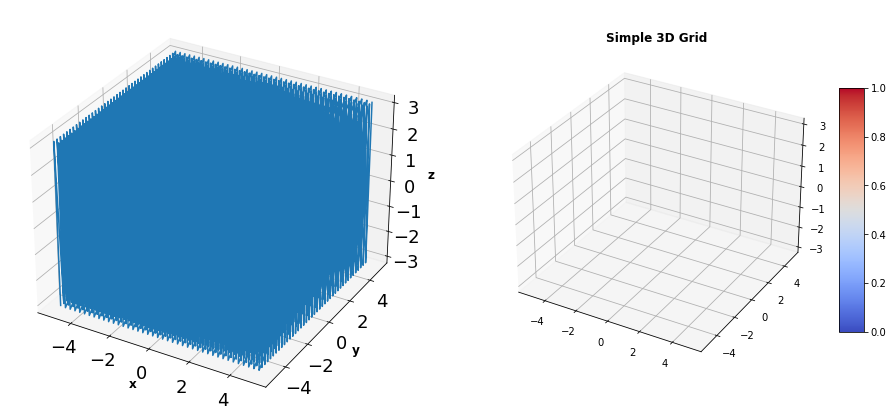

In [3]:

grid_min = expand(np.array((-5, -5, -pi)), ax = 1); # Lower corner of computation domain
grid_max = expand(np.array((5, 5, pi)), ax = 1);   # Upper corner of computation domain
N = 41*ones(3, 1).astype(np.int64)
pdDims = 3;               # 3rd dimension is periodic
g = createGrid(grid_min, grid_max, N, pdDims);

data0 = shapeCylinder(g, 3, zeros(len(N), 1), radius=1)

viz = Visualizer(winsize=(16, 9))
viz.visGrid(g, g.dim, title='Simple 3D Grid')

### A 4-D Grid

Split into two; and project the split grids back to 2D 

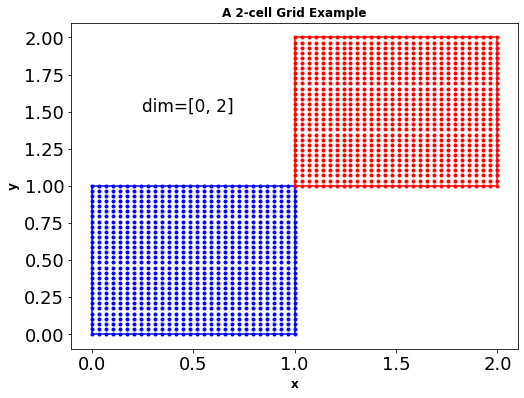

In [4]:
# this is same as sepGrid_test
num_points=30
gridIn=expand(np.array((0, 1, 0, 1)), 1)
gridOut =expand(np.array((1, 2, 1, 2)), 1)
N = num_points*ones(4,1).astype(np.int64)
g = createGrid(gridIn, gridOut, N, process=False, low_mem=True);

# print(f'len(g.xs), g.xs[0].shape {len(g.xs), g.xs[0].shape} g.N {g.N.shape}')
dims = [[0, 2], [1, 3]]

gs, ds = sepGrid(g, dims);

# Visualize
viz = Visualizer(winsize=(8, 6))
viz.visGrid(gs, dim= len(gs), dims=dims, title=f'A {len(gs)}-cell Grid Example')

### A 4-D Grid Split into 4 subgrids; 

+ re-projected the split grids back to 2D

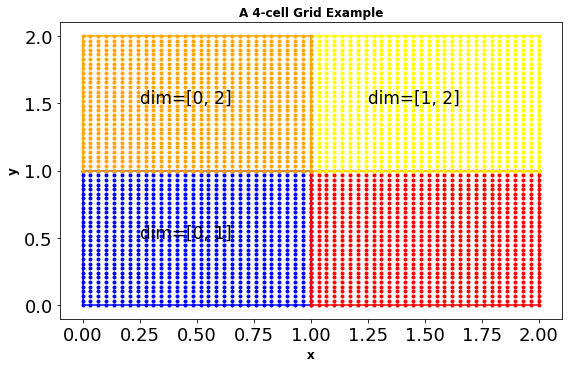

In [5]:
# 4 subcells grid
num_points=30
gridIn=expand(np.array((0, 1, 0, 1)), 1)
gridOut =expand(np.array((1, 2, 1, 2)), 1)
N = num_points*ones(4,1).astype(np.int64)
g = createGrid(gridIn, gridOut, N, process=True, low_mem=True);

# print(f'len(g.xs), g.xs[0].shape {len(g.xs), g.xs[0].shape} g.N {g.N.shape}')
dims = [[0, 2], [1, 2],  [1, 3], [0, 1]]

gs, dat = sepGrid(g, dims);

viz = Visualizer(winsize=(8, 5))

viz.visGrid(gs, len(gs), title=f'A {len(gs)}-cell Grid Example', dims=dims)

### An Eight-Grid Cell

+ Be careful with the number of points here 
+ as too many points can cause memory issues

Grid dimension > 5, may be dangerously large


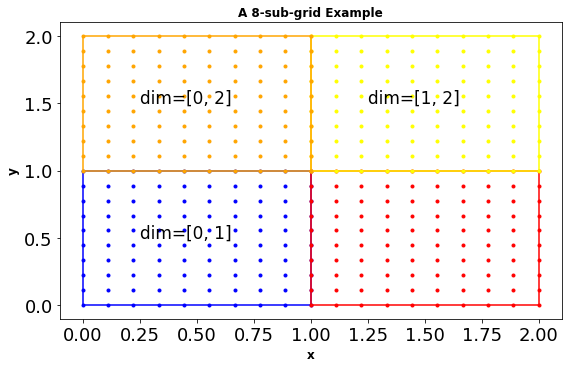

In [6]:
## Cells Division Example | Lekan August 05

gridIn= expand(np.array((0, 1, 0, 1, 1, 2, 1, 2)), 1)
gridOut =expand(np.array((1, 2, 1, 2, 2, 3, 2, 3)), 1)

num_points = 10
N = num_points*ones(8,1).astype(np.int64)

g = createGrid(gridIn, gridOut, N, process=True);

dims = [[0, 2], [1, 2],  [1, 3], [0, 1]]
gs, data = sepGrid(g, dims);
len(gs)
viz = Visualizer(winsize=(8, 5))
viz.visGrid(gs, len(gs), title=f'A {len(N)}-sub-grid Example', dims=dims)

### Making cell partitions in grids

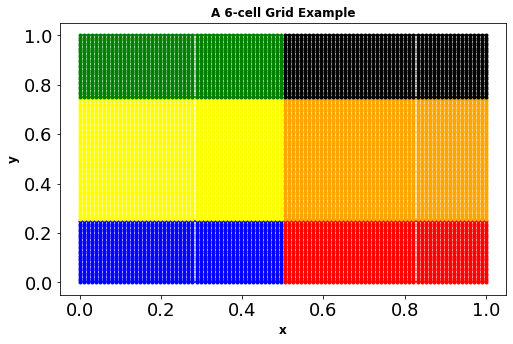

In [7]:
# A 2D grid
g = createGrid(np.array([[0, 0]]).T, np.array([[1, 1]]).T, np.array([[101, 101]]).T);

bounds = [[0, 0.5, 1], [0, 0.25, 0.75, 1]]
padding = np.array([[0, 0]]).T;
gs = splitGrid_sameDim(g, bounds, padding);

viz = Visualizer(winsize=(8, 5))
viz.visGrid(gs, gs[0].dim, title=f'A {len(gs)}-cell Grid Example')

### A 3D grid with subcells

In [8]:
# A 3D grid
gmin = zeros(3,1); gmax = ones(3,1); N = 75*ones(3,1)
bounds = [[0, 0.33, 0.5, 0.8, 1], [0, 0.5, 0.75, 1], np.linspace(0, 1, 5).tolist()]
padding = zeros(3,1)
g = createGrid(gmin, gmax, N);
gs = splitGrid_sameDim(g, bounds, padding);

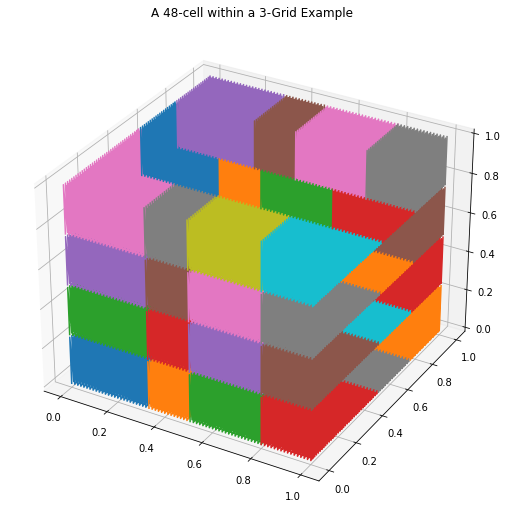

In [9]:
viz = Visualizer(winsize=(16, 9))

ax = plt.axes(projection='3d')
for i in range(len(gs)):
    g = gs[i]
    #viz.visGrid(gs[i], gs[i].dim, title=f'A {len(gs)}-cell {len(gs)}-Grid Example')
    ax.plot3D(g.xs[0].flatten(), g.xs[1].flatten(), g.xs[2].flatten())
ax.set_title(f'A {len(gs)}-cell within a {gs[0].dim}-Grid Example')
plt.show()

In [11]:
help(plt.close)

Help on function close in module matplotlib.pyplot:

close(fig=None)
    Close a figure window.
    
    Parameters
    ----------
    fig : None or int or str or `.Figure`
        The figure to close. There are a number of ways to specify this:
    
        - *None*: the current figure
        - `.Figure`: the given `.Figure` instance
        - ``int``: a figure number
        - ``str``: a figure name
        - 'all': all figures

